# VizDoom Basic Demo

## 0. Setup

In [20]:
import os

In [21]:
# Check that we have cloned the repository
if not os.path.exists('./content/ViZDoom'):
    os.makedirs('./content/ViZDoom')
    # Clone VizDoom repository to get scenarios
    !git clone https://github.com/Farama-Foundation/ViZDoom.git ./content/ViZDoom
    print(f"VizDoom scenarios cloned to ./content/ViZDoom/scenarios/")
else:
    print("Repository already cloned.")

# Set up scenario path
SCENARIO_PATH = './content/ViZDoom/scenarios/basic.cfg'

Repository already cloned.


In [22]:
%pip install vizdoom matplotlib stable-baselines3[extra]

Note: you may need to restart the kernel to use updated packages.


In [23]:
from utils import run_vizdoom_demo, VizDoomGym, TrainAndLoggingCallback

--- Starting VizDoom demo: basic, render_mode=rgb_array, frame_skip=4 ---

[ Gymnasium check_env validation ]

--- Episode 1 ---
Step 0: action=2, reward=-4.0, info={'variables': array([50.])}
Step 1: action=1, reward=-9.0, info={'variables': array([49.])}
Step 2: action=1, reward=-4.0, info={'variables': array([49.])}
Step 3: action=0, reward=-4.0, info={'variables': array([49.])}
Step 4: action=0, reward=-4.0, info={'variables': array([49.])}
Step 5: action=0, reward=-4.0, info={'variables': array([49.])}
Step 6: action=0, reward=-4.0, info={'variables': array([49.])}
Step 7: action=0, reward=-4.0, info={'variables': array([49.])}
Step 8: action=0, reward=-4.0, info={'variables': array([49.])}
Step 9: action=2, reward=-4.0, info={'variables': array([49.])}
Step 10: action=1, reward=-9.0, info={'variables': array([48.])}
Step 11: action=2, reward=-4.0, info={'variables': array([48.])}
Step 12: action=1, reward=-4.0, info={'variables': array([48.])}
Step 13: action=1, reward=-4.0, info

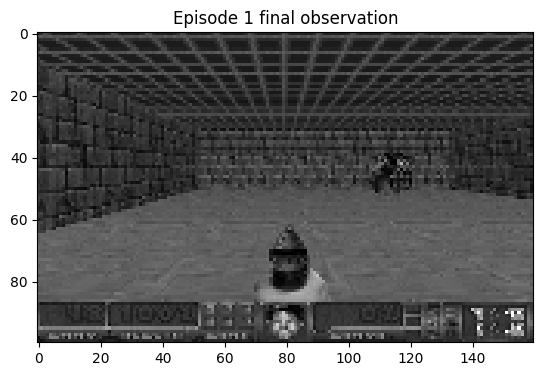

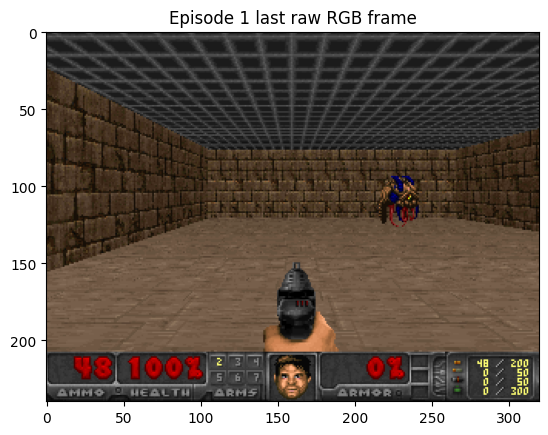


--- Demo finished ---


In [24]:
run_vizdoom_demo(cfg="basic", episodes=1, steps=14, render_mode="rgb_array", frame_skip=4)